In [1]:
import matplotlib.pyplot as plt
from scipy import sparse
import numpy as np
import matplotlib as mt
import pandas as pd
from IPython.display import display
from sklearn.datasets import load_iris
import sklearn as sk
from sklearn.model_selection import  train_test_split
import torch
from sklearn import svm

### 一、使用sklearn自带的SVM做二分类

#### 1. 准备实验数据

In [3]:
data = torch.ones(100,2)
x1 = torch.normal(2*data,1).numpy()
x2 = torch.normal(6*data,1).numpy()
y1 = np.ones(len(x1))
y2 = np.zeros(len(x2))
x = np.concatenate((x1,x2),axis=0)
y = np.concatenate((y1,y2),axis=0)

#### 2. 训练模型

In [4]:
clf = svm.SVC(kernel='linear')
clf.fit(x,y)

SVC(kernel='linear')

#### 3. 计算画图需要的参数

[[-0.82310379 -0.94941226]]
[7.29712822]


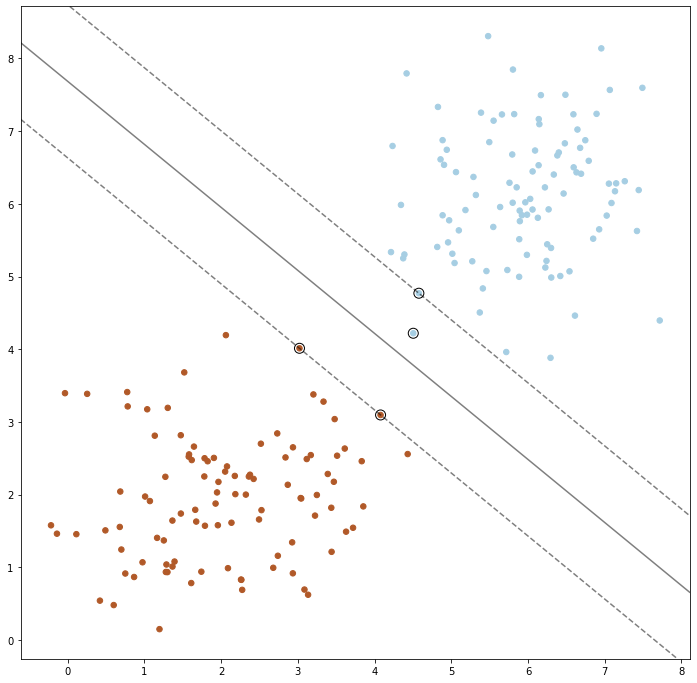

In [5]:
print(clf.coef_)
print(clf.intercept_)

plt.figure(figsize=(12,12))
plt.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

#### 4. 计算精度

In [7]:
pred = clf.predict(x)
dif = pred - y
err_num = np.sum(dif != 0)
all_num = len(x)
print('err rate is :%.2f' % (err_num/all_num*100),'%')

err rate is :0.00 %
